<a href="https://colab.research.google.com/github/Absoleme/googleCollab/blob/main/1_4_Machine_Learning_Decision_Trees_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py -O adspy_shared_utilities.py
!wget http://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colors.txt -O fruit_data_with_colors.txt

--2022-04-05 12:51:31--  http://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py
Resolving www.eyrignoux.com.fr (www.eyrignoux.com.fr)... 62.210.16.62
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py [following]
--2022-04-05 12:51:32--  https://www.eyrignoux.com.fr/coursIA/machineLearning/adspy_shared_utilities.py
Connecting to www.eyrignoux.com.fr (www.eyrignoux.com.fr)|62.210.16.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9981 (9.7K) [text/x-python]
Saving to: ‘adspy_shared_utilities.py’

adspy_shared_utilit 100%[===================>]   9.75K  --.-KB/s    in 0s      

2022-04-05 12:51:33 (225 MB/s) - ‘adspy_shared_utilities.py’ saved [9981/9981]

--2022-04-05 12:51:33--  http://www.eyrignoux.com.fr/coursIA/machineLearning/fruit_data_with_colo

In [ ]:

from adspy_shared_utilities import plot_decision_tree

#Decision trees
In chapter "1.1 - Machine Learning - intro", we saw that a good Machine Learning algorithm does not contain , because the algorithm must learn without help from the programer.

**This is precisely the goal of decision trees: they learn the "if" according to the training set.**

The algorithm tries to set them as good as possible: it finds the most significant choice, puts it at the root of the tree, and goes on at each node.

**They are several ways to determine the most discrimant "if".** Generally, decision trees, try to rise the "information level" of the system, by leveraging the physical principle of entropy: information increases when entropy (which is a measure of disorder) decreases: https://en.wikipedia.org/wiki/Information_gain_in_decision_trees . At each node, it has to find the condition which leads to the biggest loss of entropy of the system.

As often in Machine Learning and Deep Learning, concepts are simple, and mathematics complex. Mathematics is just a way to get things done. We won't try to detail mathematics of decision trees, but we will try to understand the ones of regression and neural networks. Those who want to know more about decision trees can look at this article: https://lethalbrains.com/learn-ml-algorithms-by-coding-decision-trees-439ac503c9a4

**We are working here with the "iris" dataset, which is a kind of "Hello world" of Machine Learning.** It contains 3 species of the iris flower family, that the algorithm has to identify according to the shape of their petals ans sepals: https://fr.wikipedia.org/wiki/Iris_de_Fisher

In [ ]:
iris = load_iris()
import pandas as pd
import numpy as np
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df['label'] = df.target.replace(dict(enumerate(iris.target_names)))
df[iris['feature_names'] + ['label']].sample(frac=0.1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
44,5.1,3.8,1.9,0.4,setosa
79,5.7,2.6,3.5,1.0,versicolor
86,6.7,3.1,4.7,1.5,versicolor
93,5.0,2.3,3.3,1.0,versicolor
48,5.3,3.7,1.5,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
119,6.0,2.2,5.0,1.5,virginica
64,5.6,2.9,3.6,1.3,versicolor


In [ ]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 3)
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.97


##Setting max decision tree depth to help avoid overfitting

You will see here a description of the pros and cons of decision trees: https://fr.wikipedia.org/wiki/Arbre_de_d%C3%A9cision_(apprentissage)#Avantages_et_inconv%C3%A9nients_de_la_m%C3%A9thode

This article points out the biggest drawback: overfitting. **This notion is crucial: it is one of the biggest problems of Machine Learning and Deep Learning.** In short:
- **Underfitting:** The learning is insufficient. The algorithm gets weak results with the training set and with the test set.
- **Overfitting:** The algorithm learnt the training set, but gets poor results with the test set. It "learnt by heart" each element of the training set, and mapped them to their respective answers, but it has no clue when faced to slightly different data: it generalizes poorly. **Generalization is the goal of Machine Learning and Deep Learning, so overfitting must be contented.**

In the preceding paragraph, we got an excellent result with the training set, and less good with the test set: our decision tree is slightly overfitting.

scikit-learn enables you to control the model complexity of your decision trees with three key parameters:
- First, max depth controls the maximum depth or the number of split points the decision can have and it's probably the most common parameter used to reduce tree complexity and thus reduce overfitting.
- The min samples leaf parameter is the threshold that controls what the minimum number of data instances has to be in a leaf to avoid splitting it further. This setting also reduces tree complexity.
- Finally, max leaf nodes limits the total number of nodes that are leaves of the tree.

In effect, setting one of these parameters will indirectly influence the other two parameters and vice versa. So in practice, adjusting only one of these trees is typically enough to control most overfitting. **Although even with the most optimized parameter settings, individual decision trees will still tend to overfit.**

At the end of this chapter, we will learn about advanced types of decision trees, which tackle that problem much more efficiently.

In [ ]:
clf2 = DecisionTreeClassifier(max_depth = 3).fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.98
Accuracy of Decision Tree classifier on test set: 0.97


##Visualizing decision trees
On the graphics below, dark colors show certainty.

For example, the orange leaf corresponds for sure to the class "setosa": the value=[35,0,0] means that this node contains 35 setosa, 0 virginica and 0 versicolor. The tree determines it according to the preceding fork, according to the petal width <= 0.8 cm.

The white node on its right is balanced between versicolor and virginica: 38 versicolor and 39 virginica, hence the color white.


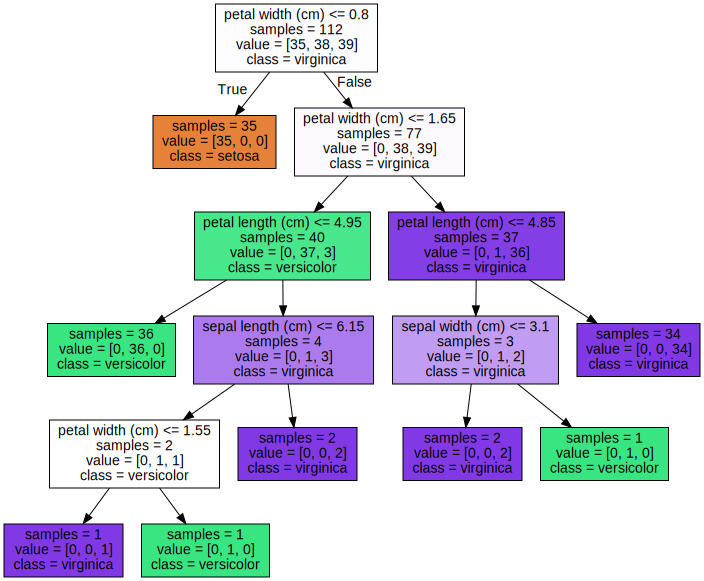

In [ ]:
plot_decision_tree(clf, iris.feature_names, iris.target_names)

##Pre-pruned version (max_depth = 3)


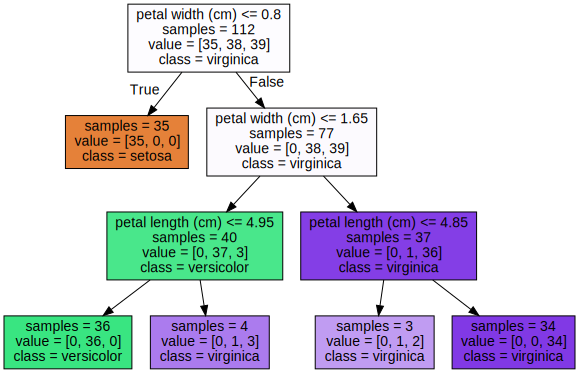

In [ ]:
plot_decision_tree(clf2, iris.feature_names, iris.target_names)

##Feature importance
Feature importance is typically a number between 0 and 1 that's assigned to an individual feature. **It indicates how important that feature is to the overall prediction accuracy.** A feature importance of zero means that the feature is not used at all in the prediction. A feature importance of one, means the feature perfectly predicts the target. Typically, feature importance numbers are always positive and they're normalized so they sum to one.

In scikit-learn, feature importance values are stored as a list in an estimated property called feature\_importances_. And note the underscore at the end of the name which indicates it's a property of the object that's set as a result of fitting the model and not say as a user defined property.

The pedal width feature easily has the largest feature importance weight. We can confirm this by looking at the decision tree that this is indeed corresponds to that features position at the top of the decision tree, showing that this first level just using the petal length feature does a good job splitting the turning data into separate classes.

Note that if a feature has a low feature importance value, that doesn't necessarily mean that the feature is not important for prediction. It simply means that the particular feature wasn't chosen at an early level of the tree and this could be because the future may be identical or highly correlated with another informative feature and so doesn't provide any new additional signal for prediction. Feature importance values don't tell us which specific classes a feature might be especially predictive for, and they also don't indicate more complex relationships between features that may influence prediction. Even so the feature importance values provide an easy to understand summary that can give useful insight about individual features in the learning model. Because feature importance can vary depending on the specific model learned for a particular train/test split for example. It's common when computing feature importance to use an average over multiple train/test splits.

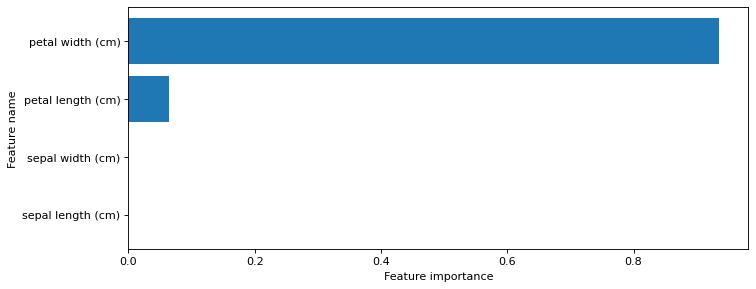

Feature importances for clf2: [0.         0.         0.06497876 0.93502124]
Feature importances for clf: [0.00670338 0.01787567 0.06251049 0.91291047]


In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf2, iris.feature_names)
plt.show()


print('Feature importances for clf2: {}'.format(clf2.feature_importances_))

print('Feature importances for clf: {}'.format(clf.feature_importances_))

Comparing the shape of the boundary to other algorithms like k-nearest neighbors is interesting. The boundary drawn by decision trees is looking like stairs, which corresponds to a series of "if" statements.

**Each algorithm has a different way to evaluate its boundaries.** In a way, they all are right, because they all give good results, but the errors that they produce will be different.
We often improve the results by cumulating the results of several kinds of algorithms, because they help to classify "difficult" points. This idea is the basis of the concept of ensembles of algorithms (or bags of algorithms), which random forests are an example, as we will see next.

**As the data have 4 features, we would need a 4D space in order to draw them, which is impossible.
Here, we simply draw each couple of 2 features in a 2D space, and we hope that it could give us a glimpse of the true 4D graphics.**

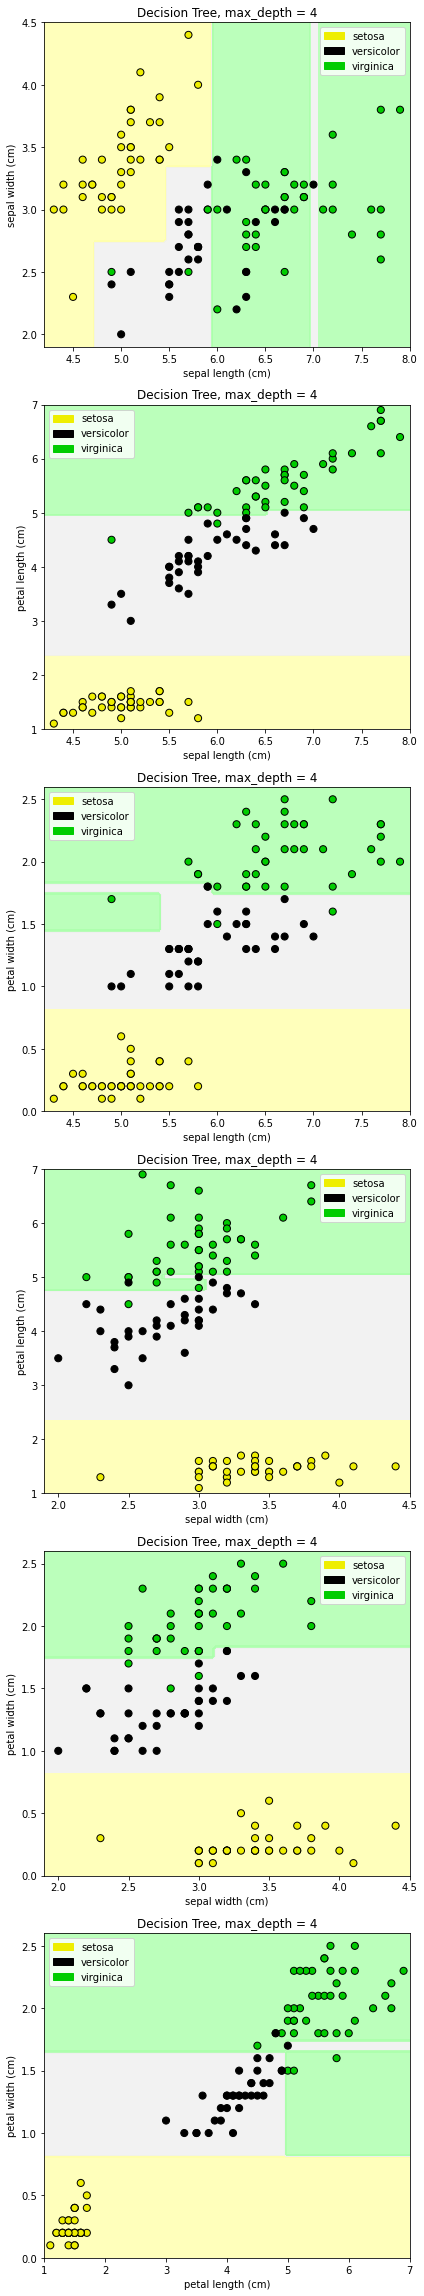

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
tree_max_depth = 4

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train

    clf = DecisionTreeClassifier(max_depth=tree_max_depth).fit(X, y)
    title = 'Decision Tree, max_depth = {:d}'.format(tree_max_depth)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             iris.target_names)

    axis.set_xlabel(iris.feature_names[pair[0]])
    axis.set_ylabel(iris.feature_names[pair[1]])

plt.tight_layout()
plt.show()

##Decision Trees on a real-world dataset: tumeur bénine ou maligne ?

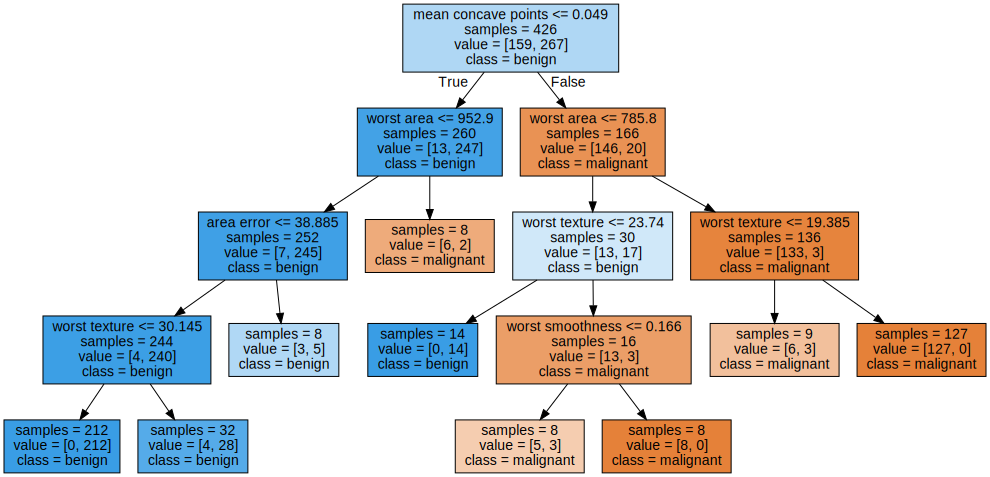

In [ ]:

from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 8,
                            random_state = 0).fit(X_train, y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

#Ensembles of Decision Trees
As stated above, the main inconvenient of decision trees is their tendancy to overfitting.

There are some improvements to overcome this disadvantage:
- **gradient boosted trees:** the tree is pruned in order to prevent overfitting, then optimized with a gradient descent similar to regression.
- **random forests:** a radically different point of view: a lot of slightly different trees are trained on randomly different subsets of the training set. They are not pruned, and their average gives the resulting so-called "random forest".

##Random forests
**A widely used and effective method in machine learning involves creating learning models known as ensembles.** An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone. Why are ensembles effective? Well, one reason is that if we have different learning models, although each of them might perform well individually, they'll tend to make different kinds of mistakes on the data set. And typically, this happens because each individual model might overfit to a different part of the data. By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance. Random forests are an example of the ensemble idea applied to decision trees.

To create a random forest model you first decide on how many trees to build. This is set using the n_estimated parameter for both RandomForestClassifier and RandomForestRegressor. **Each tree were built from a different random sample of the data called the bootstrap sample.** If your training set has N instances or samples in total, a bootstrap sample of size N is created by just repeatedly picking one of the N dataset rows at random with replacement, that is, allowing for the possibility of picking the same row again at each selection. You repeat this random selection process N times. The resulting bootstrap sample has N rows just like the original training set but with possibly some rows from the original dataset missing and others occurring multiple times just due to the nature of the random selection with replacement. When building a decision tree for a random forest, the process is almost the same as for a standard decision tree but with one important difference. When picking the best split for a node, **instead of finding the best split across all possible features, a random subset of features is chosen** and the best split is found within that smaller subset of features. The number of features in the subset that are randomly considered at each stage is controlled by the max_features parameter. **This randomness in selecting the bootstrap sample to train an individual tree in a forest ensemble, combined with the fact that splitting a node in the tree is restricted to random subsets of the features of the split, virtually guarantees that all of the decision trees and the random forest will be different. **

Once a random forest model is trained, it predicts the target value for new instances by first making a prediction for every tree in the random forest. For regression tasks the overall prediction is then typically the mean of the individual tree predictions. For classification the overall prediction is based on a weighted vote. Each tree gives a probability for each possible target class label then the probabilities for each class are averaged across all the trees and the class with the highest probability is the final predicted class.

Overall, you can get an impression of the increased complexity of this random forest model in capturing both the global and local patterns in the training data compared to the single decision tree model we saw earlier.

Here is an article about random forests: https://towardsdatascience.com/understanding-random-forest-58381e0602d2


###Parameters

So to recap, here are some of the key parameters that you'll need for using random forests. **N_estimators sets the number of trees to use. The default value for n_estimators is 10 and increasing this number for larger data sets is almost certainly a good idea since ensembles that can average over more trees will reduce overfitting.** Just bear in mind that increasing the number of trees in the model will also increase the computational cost of training. You'll use more time and more memory. So in practice you'll want to choose the parameters that make best use of the resources available on your system.

**The max_features parameter has a strong effect on performance. It has a large influence on how diverse the random trees in the forest are.** Typically, the default setting of max features, which for classification is the square root of the total number of features and for regression is the log base two of the total number of features, works quite well in practice although explicitly adjusting max_features may give you some additional performance gain with smaller values of max features tending to reduce overfitting.

**The max depth parameter controls the depth of each tree in the ensemble.** The default setting for this is none, in other words, the nodes in a tree will continue to be split until all leaves contain the same class or have fewer samples than the minimum sample split parameter value, which is two by default. Most systems now have a multi-core processor and so you can use the end jobs parameter to tell the random forest algorithm how many cores to use in parallel to train the model. Generally, you can expect something close to a linear speed up. So, for example, if you have four cores, the training will be four times as fast as if you just used one. If you set end jobs to negative one it will use all the cores on your system and setting end jobs to a number that's more than the number of cores on your system won't have any additional effect.

Finally, given the random nature of random forests, if you want reproducible results it's especially important to choose a fixed setting for the random state parameter. In the examples we've shown here we typically set random state to zero but any fixed number will work just as well.

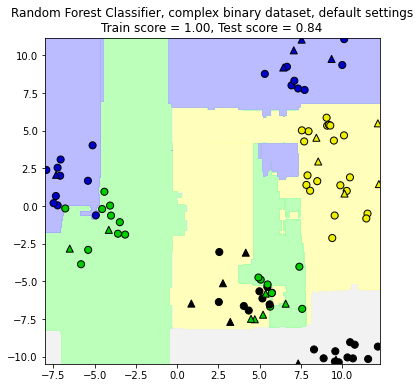

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = RandomForestClassifier().fit(X_train, y_train)
title = 'Random Forest Classifier, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

##Random forest: Fruit dataset

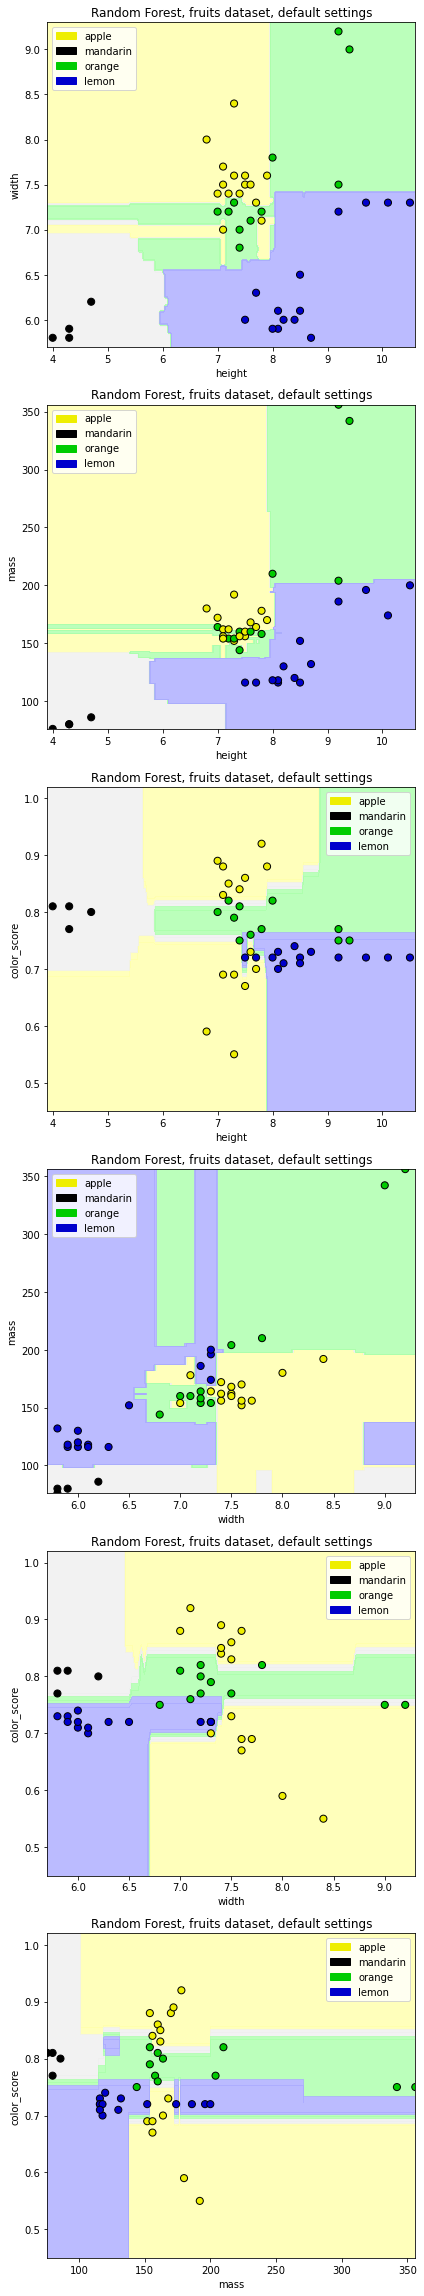

Random Forest, Fruit dataset, default settings
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.80


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
import pandas as pd


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_train, X_test, y_train, y_test = train_test_split(X_fruits.to_numpy(),
                                                   y_fruits.to_numpy(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

title = 'Random Forest, fruits dataset, default settings'
pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train

    clf = RandomForestClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)

    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])

plt.tight_layout()
plt.show()

clf = RandomForestClassifier(n_estimators = 10,
                            random_state=0).fit(X_train, y_train)

print('Random Forest, Fruit dataset, default settings')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

###Random Forests on a real-world dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = RandomForestClassifier(max_features = 8, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.97


###Pros and cons
So, on the positive side, random forest are widely used because they're very powerful. They give excellent prediction performance on a wide variety of problems and they don't require careful scaling of the feature data or extensive parameter tuning. And even though building many different trees requires a corresponding increase in computation, building random forests is easily paralyzed across multiple CPU's.

On the negative side while random forests do inherit many of the benefits of decision trees, one big difference is that random forest models can be very difficult for people to interpret making it difficult to see the predictive structure of the features or to know why a particular prediction was made. In addition, random forests are not a good choice for tasks that have very high dimensional sparse features like text classification, where linear models can provide efficient training and fast accurate prediction.


##Gradient-boosted decision trees
The key idea of gradient boosted decision trees is that they build a series of trees, where **each tree is trained, so that it attempts to correct the mistakes of the previous tree in the series.**

Typically, gradient boosted tree ensembles use lots of shallow trees known in machine learning as weak learners, built in a nonrandom way, to create a model that makes fewer and fewer mistakes as more trees are added.

Once the model is built, making predictions with a gradient boosted tree models is fast and doesn't use a lot of memory.

Like random forests, the number of estimators in the gradient boosted tree ensemble is an important parameter in controlling model complexity.

A new parameter that does not occur with random forest is something called the learning rate.  

**When the learning rate is high, each successive tree put strong emphases on correcting the mistakes of its predecessor, and thus may result in a more complex individual tree.** With smaller settings of the learning rate, there's less emphasis on thoroughly correcting the errors of the previous step, which tends to lead to simpler trees at each step.

By default, the learning rate parameter is set to 0.1, the n_estimators parameter giving the number of trees to use is set to 100, and the max depth is set to 3.

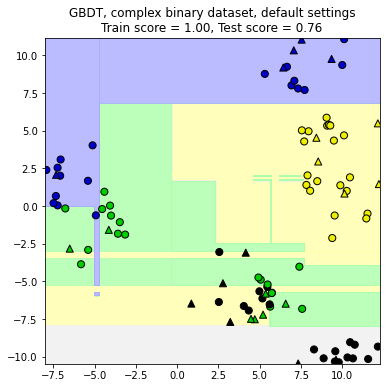

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(1, 1, figsize=(6, 6))

clf = GradientBoostingClassifier().fit(X_train, y_train)
title = 'GBDT, complex binary dataset, default settings'
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test,
                                         y_test, title, subaxes)

plt.show()

###Gradient boosted decision trees on the fruit dataset

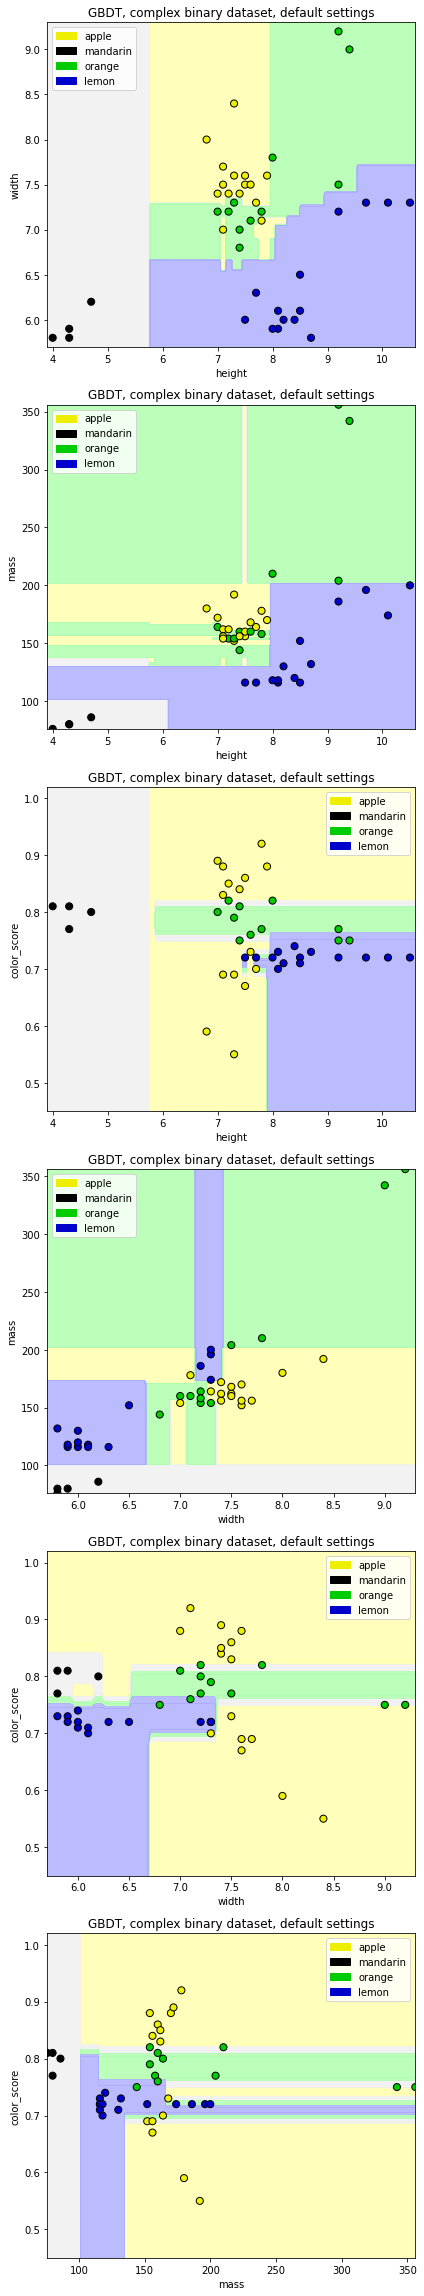

GBDT, Fruit dataset, default settings
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.80


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fruits.to_numpy(),
                                                   y_fruits.to_numpy(),
                                                   random_state = 0)
fig, subaxes = plt.subplots(6, 1, figsize=(6, 32))

pair_list = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]

for pair, axis in zip(pair_list, subaxes):
    X = X_train[:, pair]
    y = y_train

    clf = GradientBoostingClassifier().fit(X, y)
    plot_class_regions_for_classifier_subplot(clf, X, y, None,
                                             None, title, axis,
                                             target_names_fruits)

    axis.set_xlabel(feature_names_fruits[pair[0]])
    axis.set_ylabel(feature_names_fruits[pair[1]])

plt.tight_layout()
plt.show()
clf = GradientBoostingClassifier().fit(X_train, y_train)

print('GBDT, Fruit dataset, default settings')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

###Gradient-boosted decision trees on a real-world dataset
We can see that the first result has perfect accuracy on the training set, which indicates the model is likely overfitting.

Two ways to learn a less complex gradient boosted tree model are, to reduce the learning rate, so that each tree doesn't try as hard to learn a more complex model, that fixes the mistakes of its predecessor. And to reduce the max_depth parameter for the individual trees in the ensemble.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = GradientBoostingClassifier(random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf.score(X_test, y_test)))

clf = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2, random_state = 0)
clf.fit(X_train, y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


###Pros and cons
**Downsides:**
- ensembles of trees such as random forests are difficult to interpret, compared to individual decision trees. However, this often may not matter for many applications where prediction accuracy is the most important goal.
- Gradient boosted methods can require careful tuning of the learning rate and other parameters. And the training process can require a lot of computation.
- Like the other tree based methods we saw, using gradient boosted methods where the featured space has thousands of features with sparse values, is usually not a good choice for accuracy and computational cost reasons.

**The key parameters controlling model complexity for gradient boosted tree models are, n_estimators which sets the number of small decisions trees in the ensemble, and the learning rate. **

Typically, these two parameters are tuned together. Since making the learning rates smaller, will require more trees to maintain model complexity.

Unlike random forest, increasing an n_estimators can lead to overfeeding. So typically, the n_estimators setting is chosen to best exploit the speed and memory capabilities of the system during the training. And other parameters like the learning rate are then adjusted, given that fixed an n_estimators setting.

The max_depth parameter can also have an effect of model complexity, but controlling the depth, and has a complexity of the individual trees. The gradient boosting method assumes, that each trees is a weak learner, and so the max_depth parameter is usually quite small, on the order of three to five, for most applications.

## Random Forest vs Gradient Boosting
Like random forests, gradient boosting is a set of decision trees. The two main differences are:

- **How trees are built**: random forests builds each tree independently while gradient boosting builds one tree at a time. This additive model (ensemble) works in a forward stage-wise manner, introducing a weak learner to improve the shortcomings of existing weak learners.
- **Combining results**: random forests combine results at the end of the process (by averaging or "majority rules") while gradient boosting combines results along the way.

If you carefully tune parameters, gradient boosting can result in better performance than random forests. However, gradient boosting may not be a good choice if you have a lot of noise, as it can result in overfitting. They also tend to be harder to tune than random forests.

Random forests and gradient boosting each excel in different areas. Random forests perform well for multi-class object detection and bioinformatics, which tends to have a lot of statistical noise. Gradient Boosting performs well when you have unbalanced data such as in real time risk assessment.

![Texte alternatif…](https://pbs.twimg.com/media/EAmjMYpWwAALfVU?format=jpg&name=medium)